
## Mulitple Linear Regression
### Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Reading and Understanding Data

In [ ]:
bike_df = pd.read_csv('day.csv')
#reading the data
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Dataset has 730 rows and 16 columns

In [ ]:
bike_df.shape #checking the size of the data

(730, 16)

In [ ]:
bike_df.info() #checking out for detailed info about the dataset
#Checking for count and the type of data present in the given dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
bike_df.size #describes the total size of the dataset

11680

## Data Cleaning

### Drop columns that are nt useful for data analysis
- instant:as it is the record index
- dteday: as the features of date are alreeady there like yr month and weekday
- casual and registered as the are in cnt, because cnt is sum of both the values

In [ ]:
bike_df.isnull().sum() #checking for missing values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
bike_df.drop(['instant'],axis=1,inplace=True)
#dropping instant column as it is merely a index column which has no significance for our target

In [ ]:
bike_df.drop(['dteday'],axis=1,inplace=True)
#dteday is not useful as month and weekday are covering it

bike_df.drop(['casual'],axis=1,inplace=True)
bike_df.drop(['registered'],axis=1,inplace=True)
#Removing casual and registered as cnt is sum of these

 Inspecting data after dropping

In [ ]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [ ]:
bike_df.columns #identifying all the column head

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [ ]:
bike_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


So from the above correlation formed we can clearly see that season,month and weekday which are supposed
to be non-numerical are numerical which should be changed


### Handling outliers

In [ ]:
bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [ ]:
bike_df.nunique() #gives info about unique values present in data

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

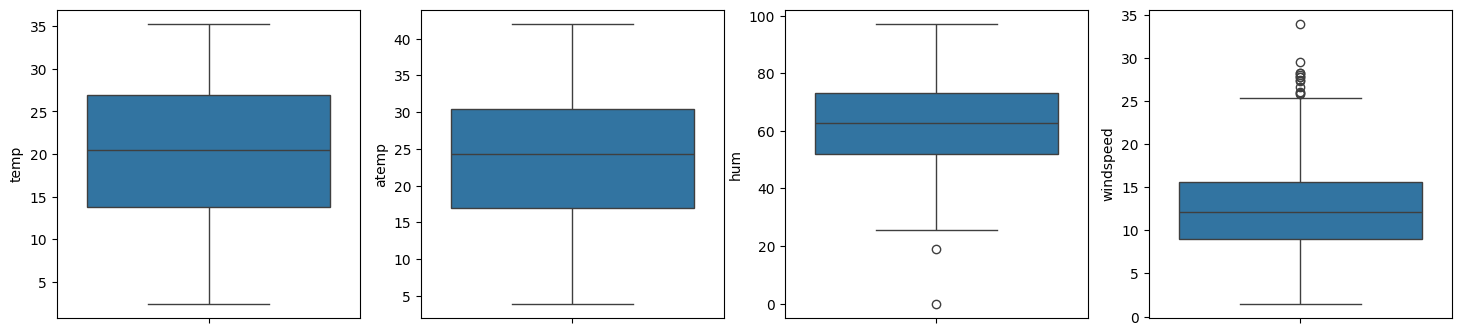

In [ ]:
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_df)
    i+=1

So from the above plots it is clear that we don't have any outliers

## EDA

In [ ]:
#changing categorical data which were primarily numeric to more meaningful one
bike_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike_df.mnth = bike_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike_df.weekday = bike_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


### Drawing pairplots to check for linear relationship

<Figure size 1500x3000 with 0 Axes>

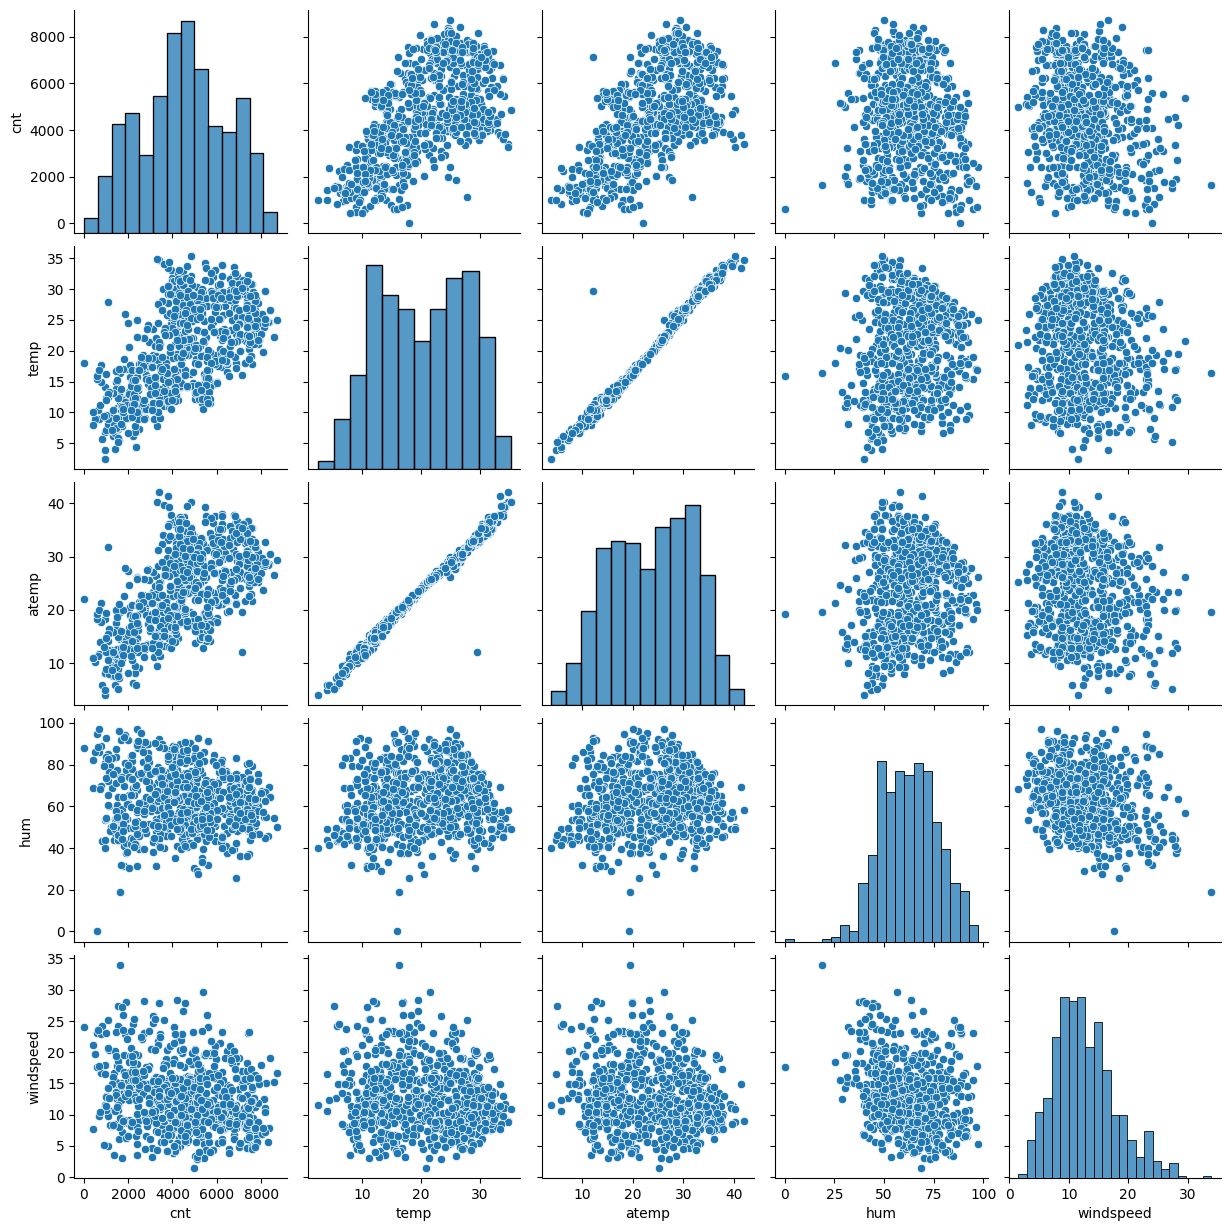

In [ ]:
plt.figure(figsize = (15,30))
sns.pairplot(data=bike_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

- So from the above plots we can clearly understand that temp and atemp are having high correlation
- And from the plots we can also say that there is alinear relationship between TEMP and ATEMP

### Visualising data to find correlation from numerical variables

<Figure size 2000x1500 with 0 Axes>

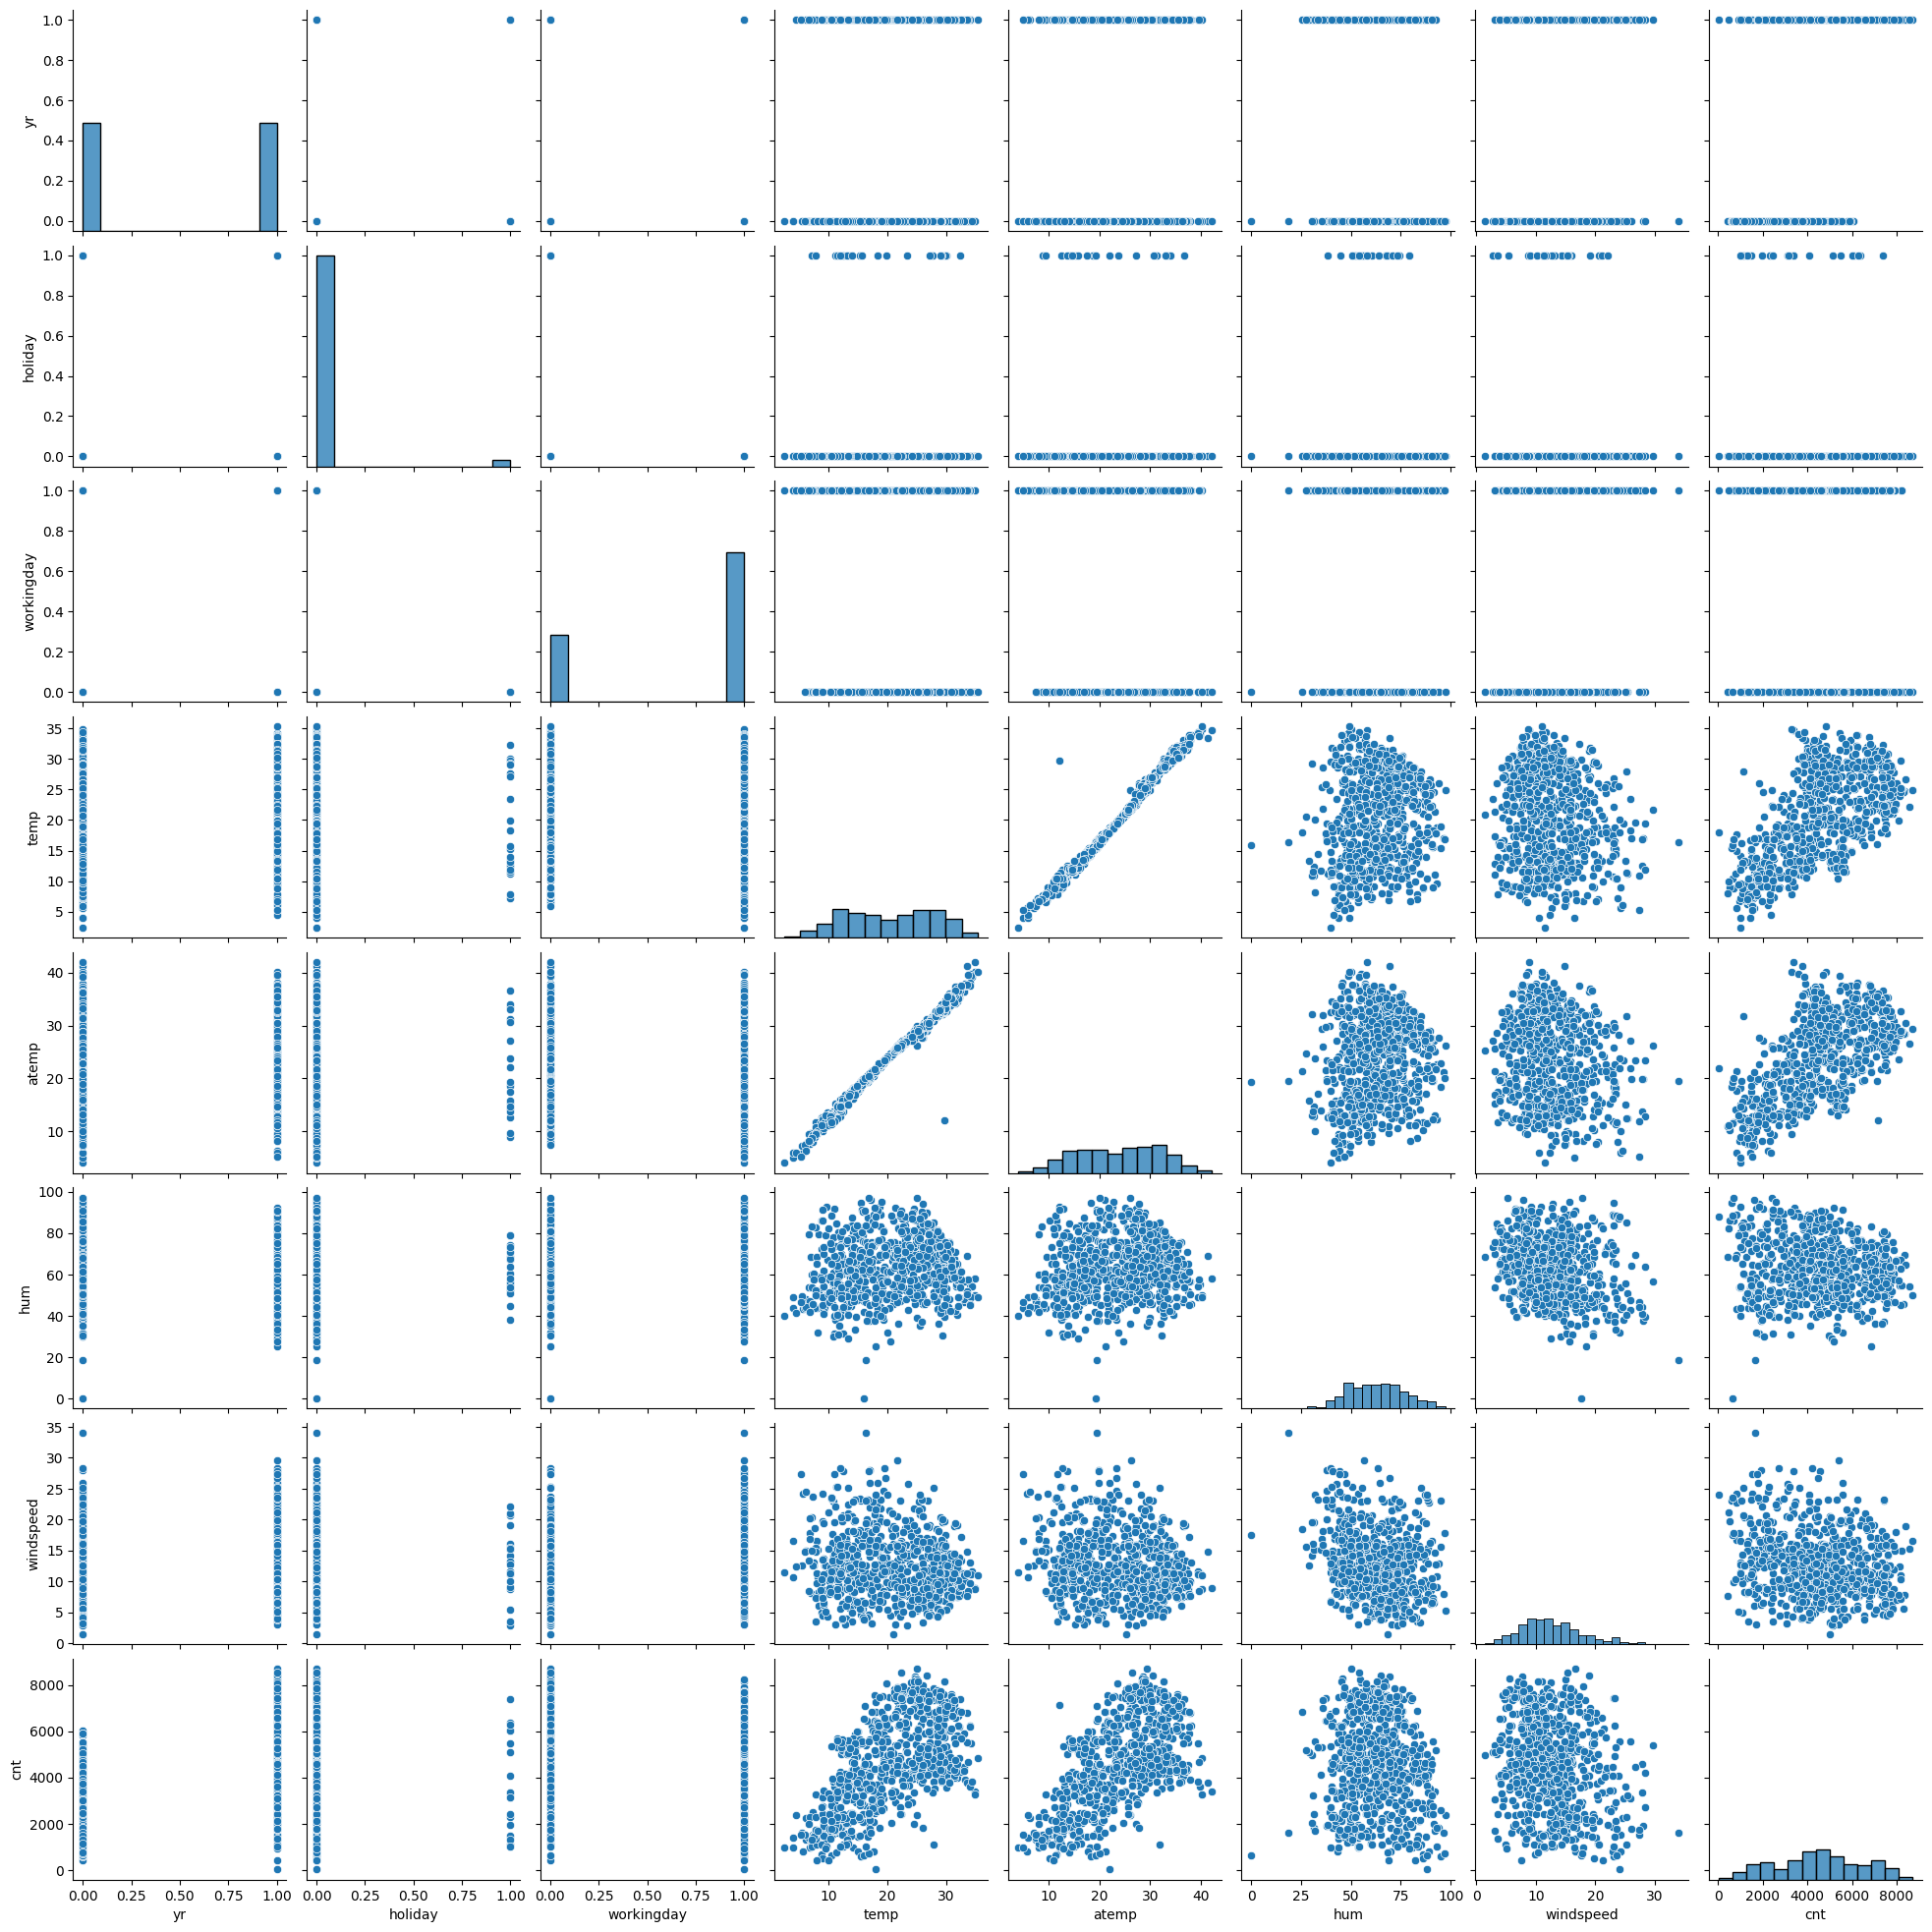

In [ ]:
plt.figure(figsize=(20,15))
sns.pairplot(bike_df)
plt.show()

### Heatmap for correlation between numeric variables

In [ ]:
bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [ ]:
bike_df.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [ ]:
bike_df.season.value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

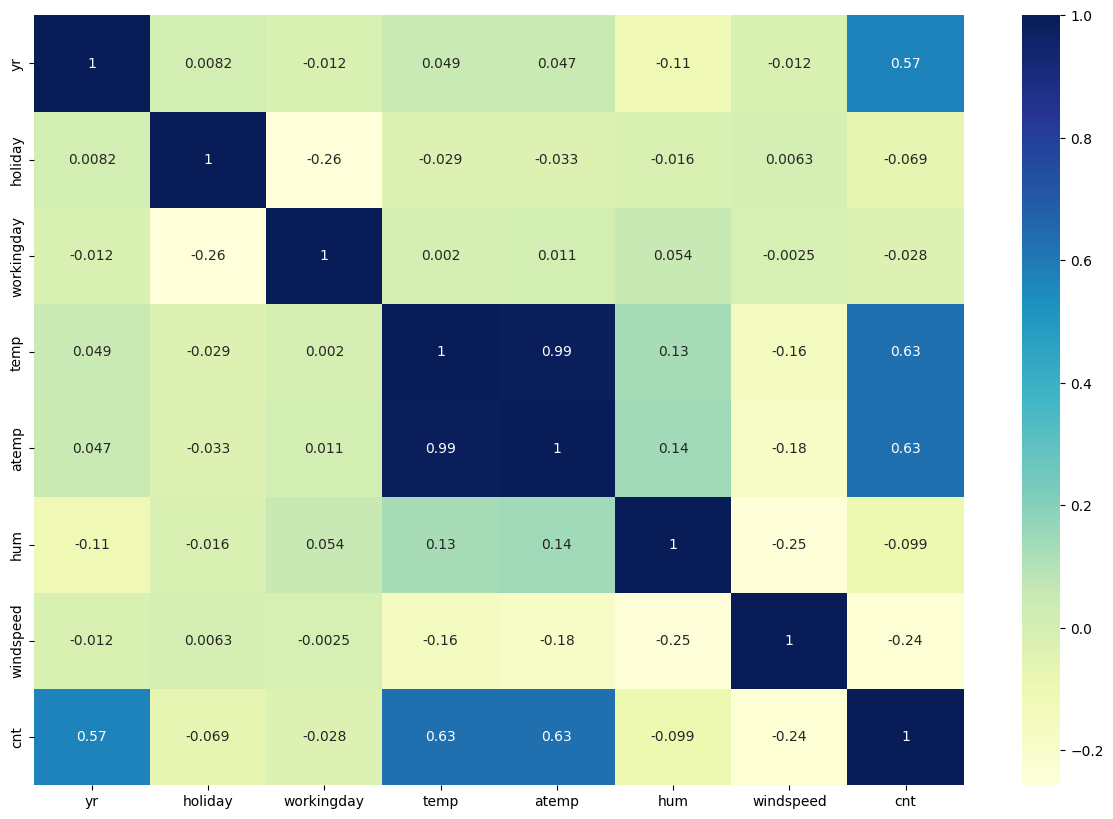

In [ ]:
numeric_cols = bike_df.drop(['season'], axis=1).select_dtypes(include=['int64', 'float64'])

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_cols.corr(), cmap="YlGnBu", annot=True)
plt.show()

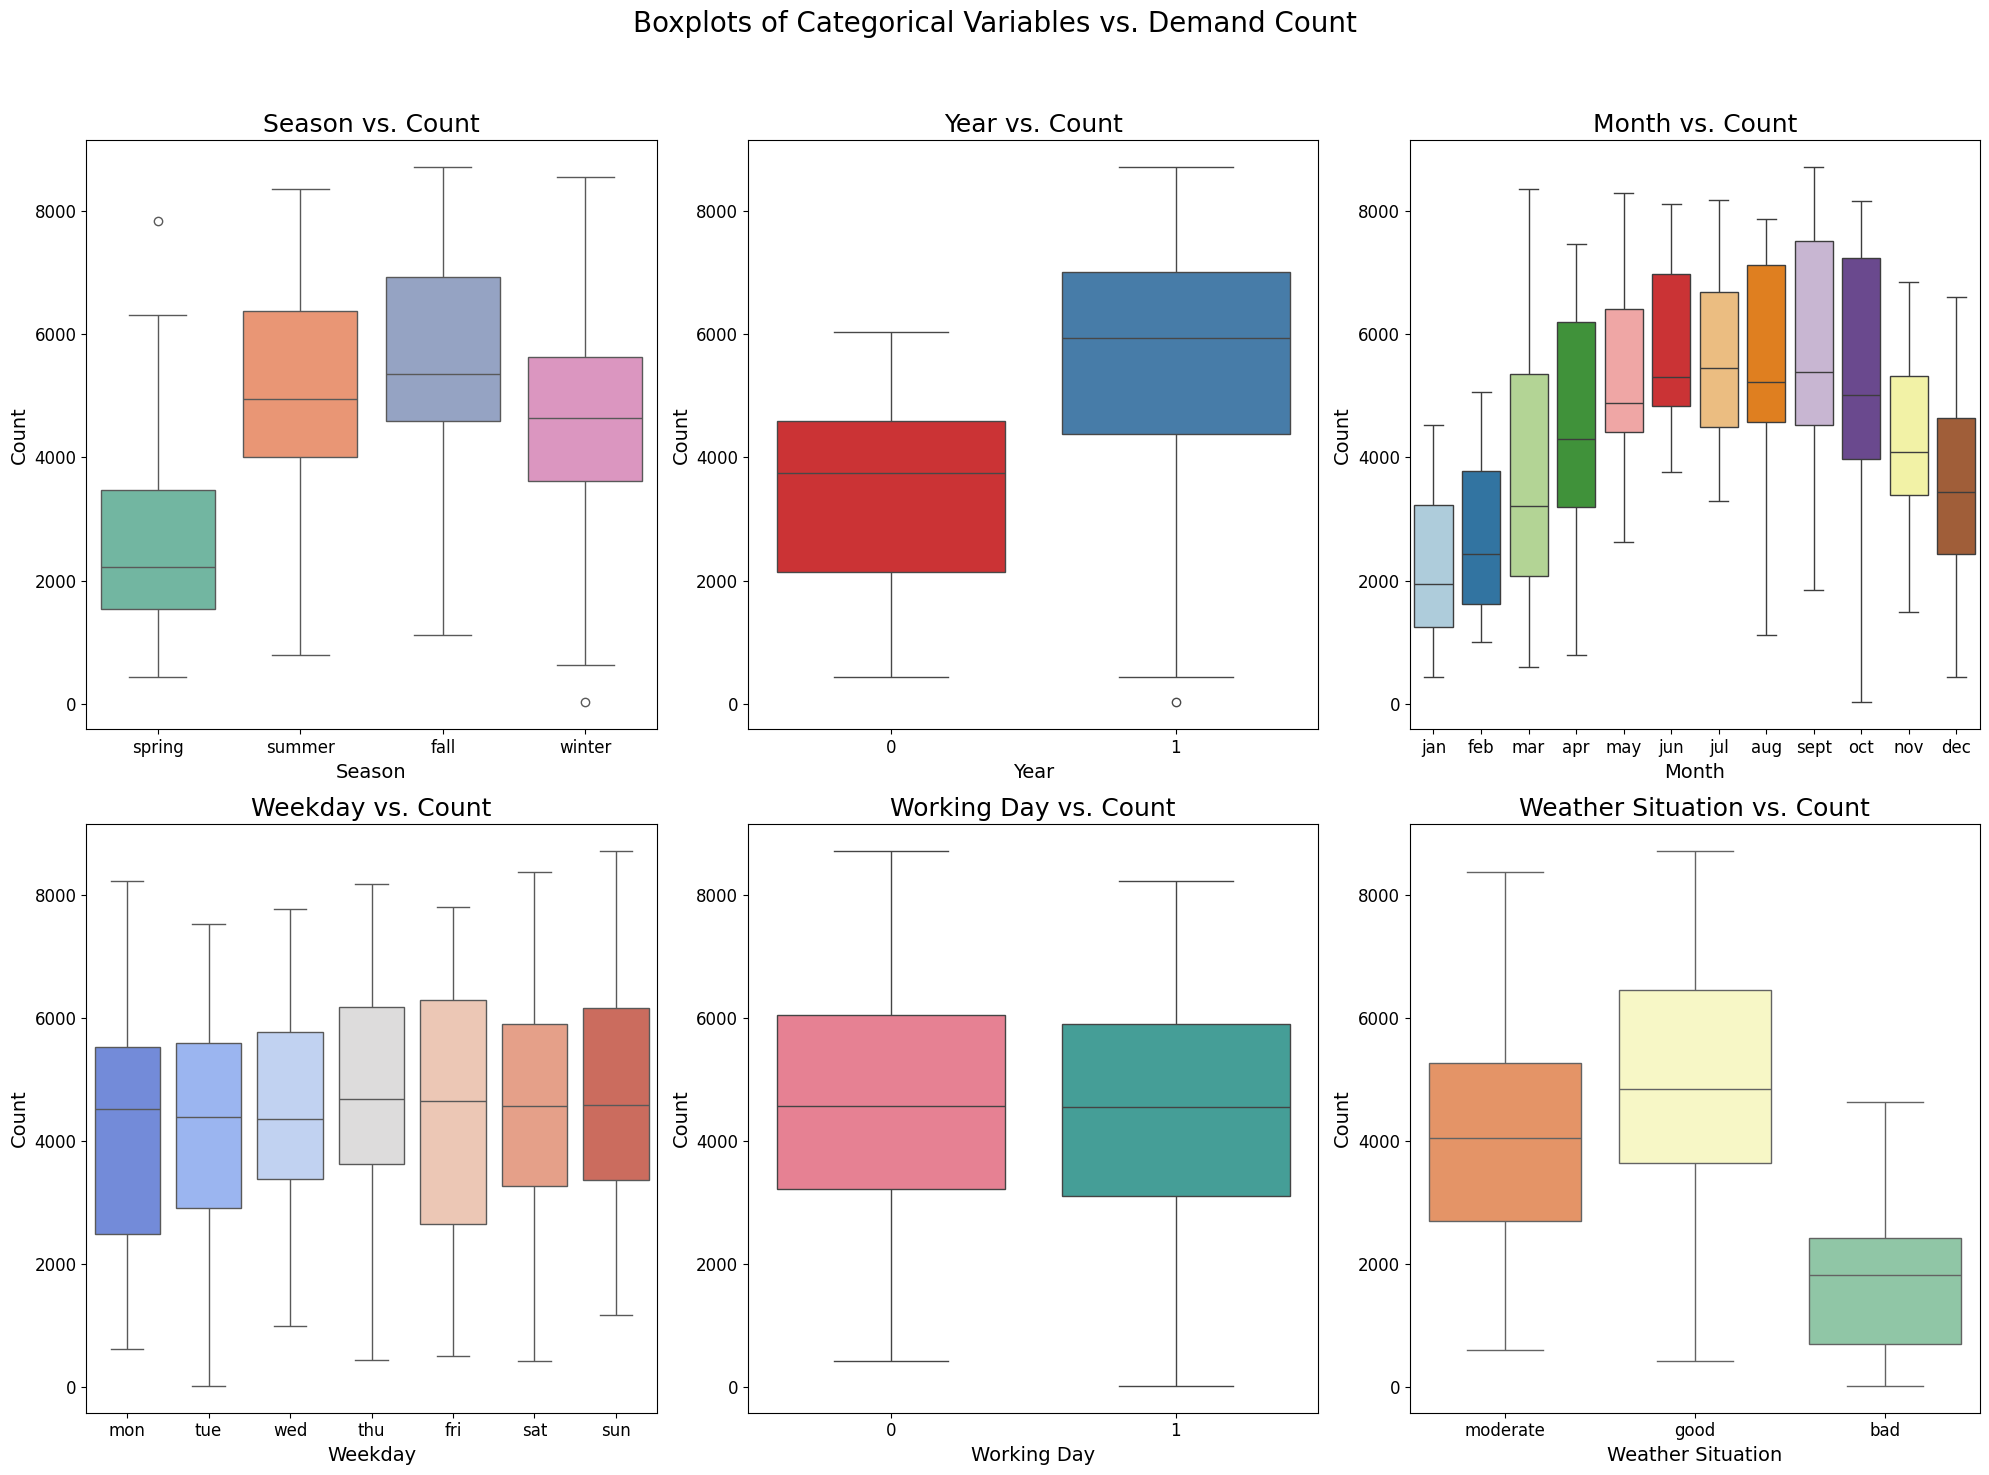

In [ ]:
# Visualising the categorical variables with different colors
plt.figure(figsize=(20, 15))

plt.subplot(2, 3, 1)
sns.boxplot(x='season', y='cnt', data=bike_df, palette='Set2')
plt.title('Season vs. Count', fontsize=18)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2, 3, 2)
sns.boxplot(x='yr', y='cnt', data=bike_df, palette='Set1')
plt.title('Year vs. Count', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2, 3, 3)
sns.boxplot(x='mnth', y='cnt', data=bike_df, palette='Paired')
plt.title('Month vs. Count', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2, 3, 4)
sns.boxplot(x='weekday', y='cnt', data=bike_df, palette='coolwarm')
plt.title('Weekday vs. Count', fontsize=18)
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2, 3, 5)
sns.boxplot(x='workingday', y='cnt', data=bike_df, palette='husl')
plt.title('Working Day vs. Count', fontsize=18)
plt.xlabel('Working Day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2, 3, 6)
sns.boxplot(x='weathersit', y='cnt', data=bike_df, palette='Spectral')
plt.title('Weather Situation vs. Count', fontsize=18)
plt.xlabel('Weather Situation', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.suptitle('Boxplots of Categorical Variables vs. Demand Count', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


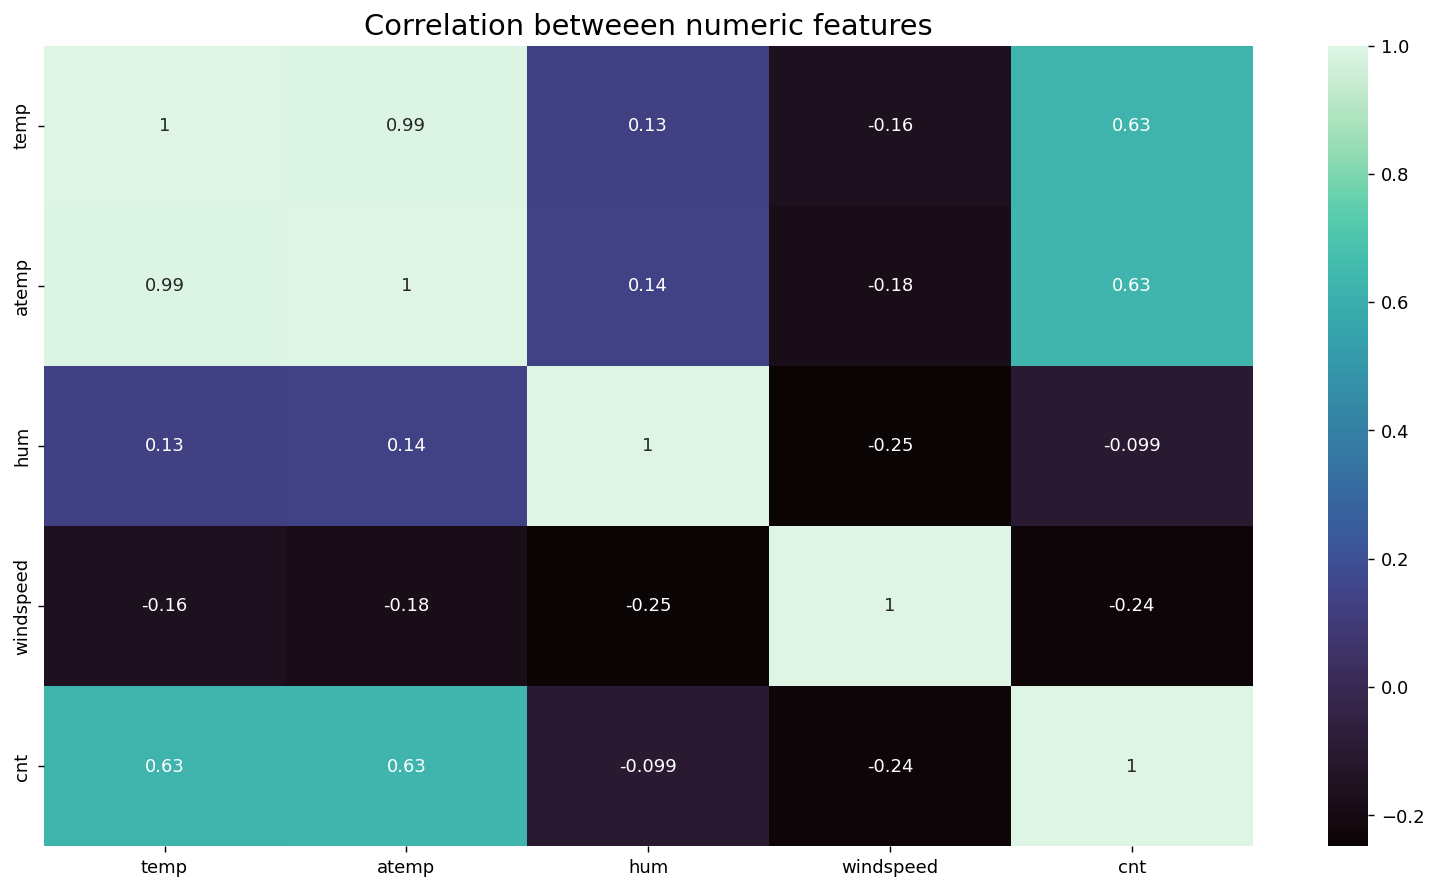

In [ ]:
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation betweeen numeric features",fontsize=16)
sns.heatmap(bike_df[num_features].corr(),annot= True,cmap="mako")
plt.show()

In [ ]:
bike_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Data preparation for linar regression

Creating dummy variables for categorical variables

In [ ]:
bike_df = pd.get_dummies(data=bike_df,columns=["season","mnth","weekday"],drop_first=True)
bike_df = pd.get_dummies(data=bike_df,columns=["weathersit"])

In [ ]:
bike_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [ ]:
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,True,False,False,False,False,False,False,False,True
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,False,False,True,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,False,False,False,False,True,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,True,False,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,False,False,True,False


### Splitting data into train and test data

In [ ]:
bike_df.shape

(730, 31)

In [ ]:
#y to contain only target variable
y=bike_df.pop('cnt')

#X is all remainign variable also our independent variables
X=bike_df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,True,False,False,...,False,True,False,False,False,False,False,False,False,True
1,0,0,1,14.902598,17.68695,69.6087,16.652113,True,False,False,...,False,False,False,False,False,True,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,True,False,False,...,False,False,False,False,False,False,True,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,True,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,True,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


In [ ]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [ ]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,0.550874,0.526518,0.654174,0.414873
std,0.500067,0.163398,0.459303,0.227231,0.212976,0.143648,0.185619
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,False,False,True,...,False,False,False,False,False,False,False,False,False,True
645,1,1,0,0.403972,0.404998,0.731215,0.419004,False,False,True,...,False,False,False,False,False,True,False,False,False,True
163,0,0,1,0.717562,0.685963,0.509660,0.708724,False,True,False,...,False,False,False,False,False,False,True,False,True,False
360,0,0,1,0.331287,0.326273,0.785745,0.415925,True,False,False,...,False,False,False,False,True,False,False,False,False,True
640,1,0,1,0.745598,0.682653,0.817947,0.110593,False,False,True,...,False,False,False,False,True,False,False,False,False,True


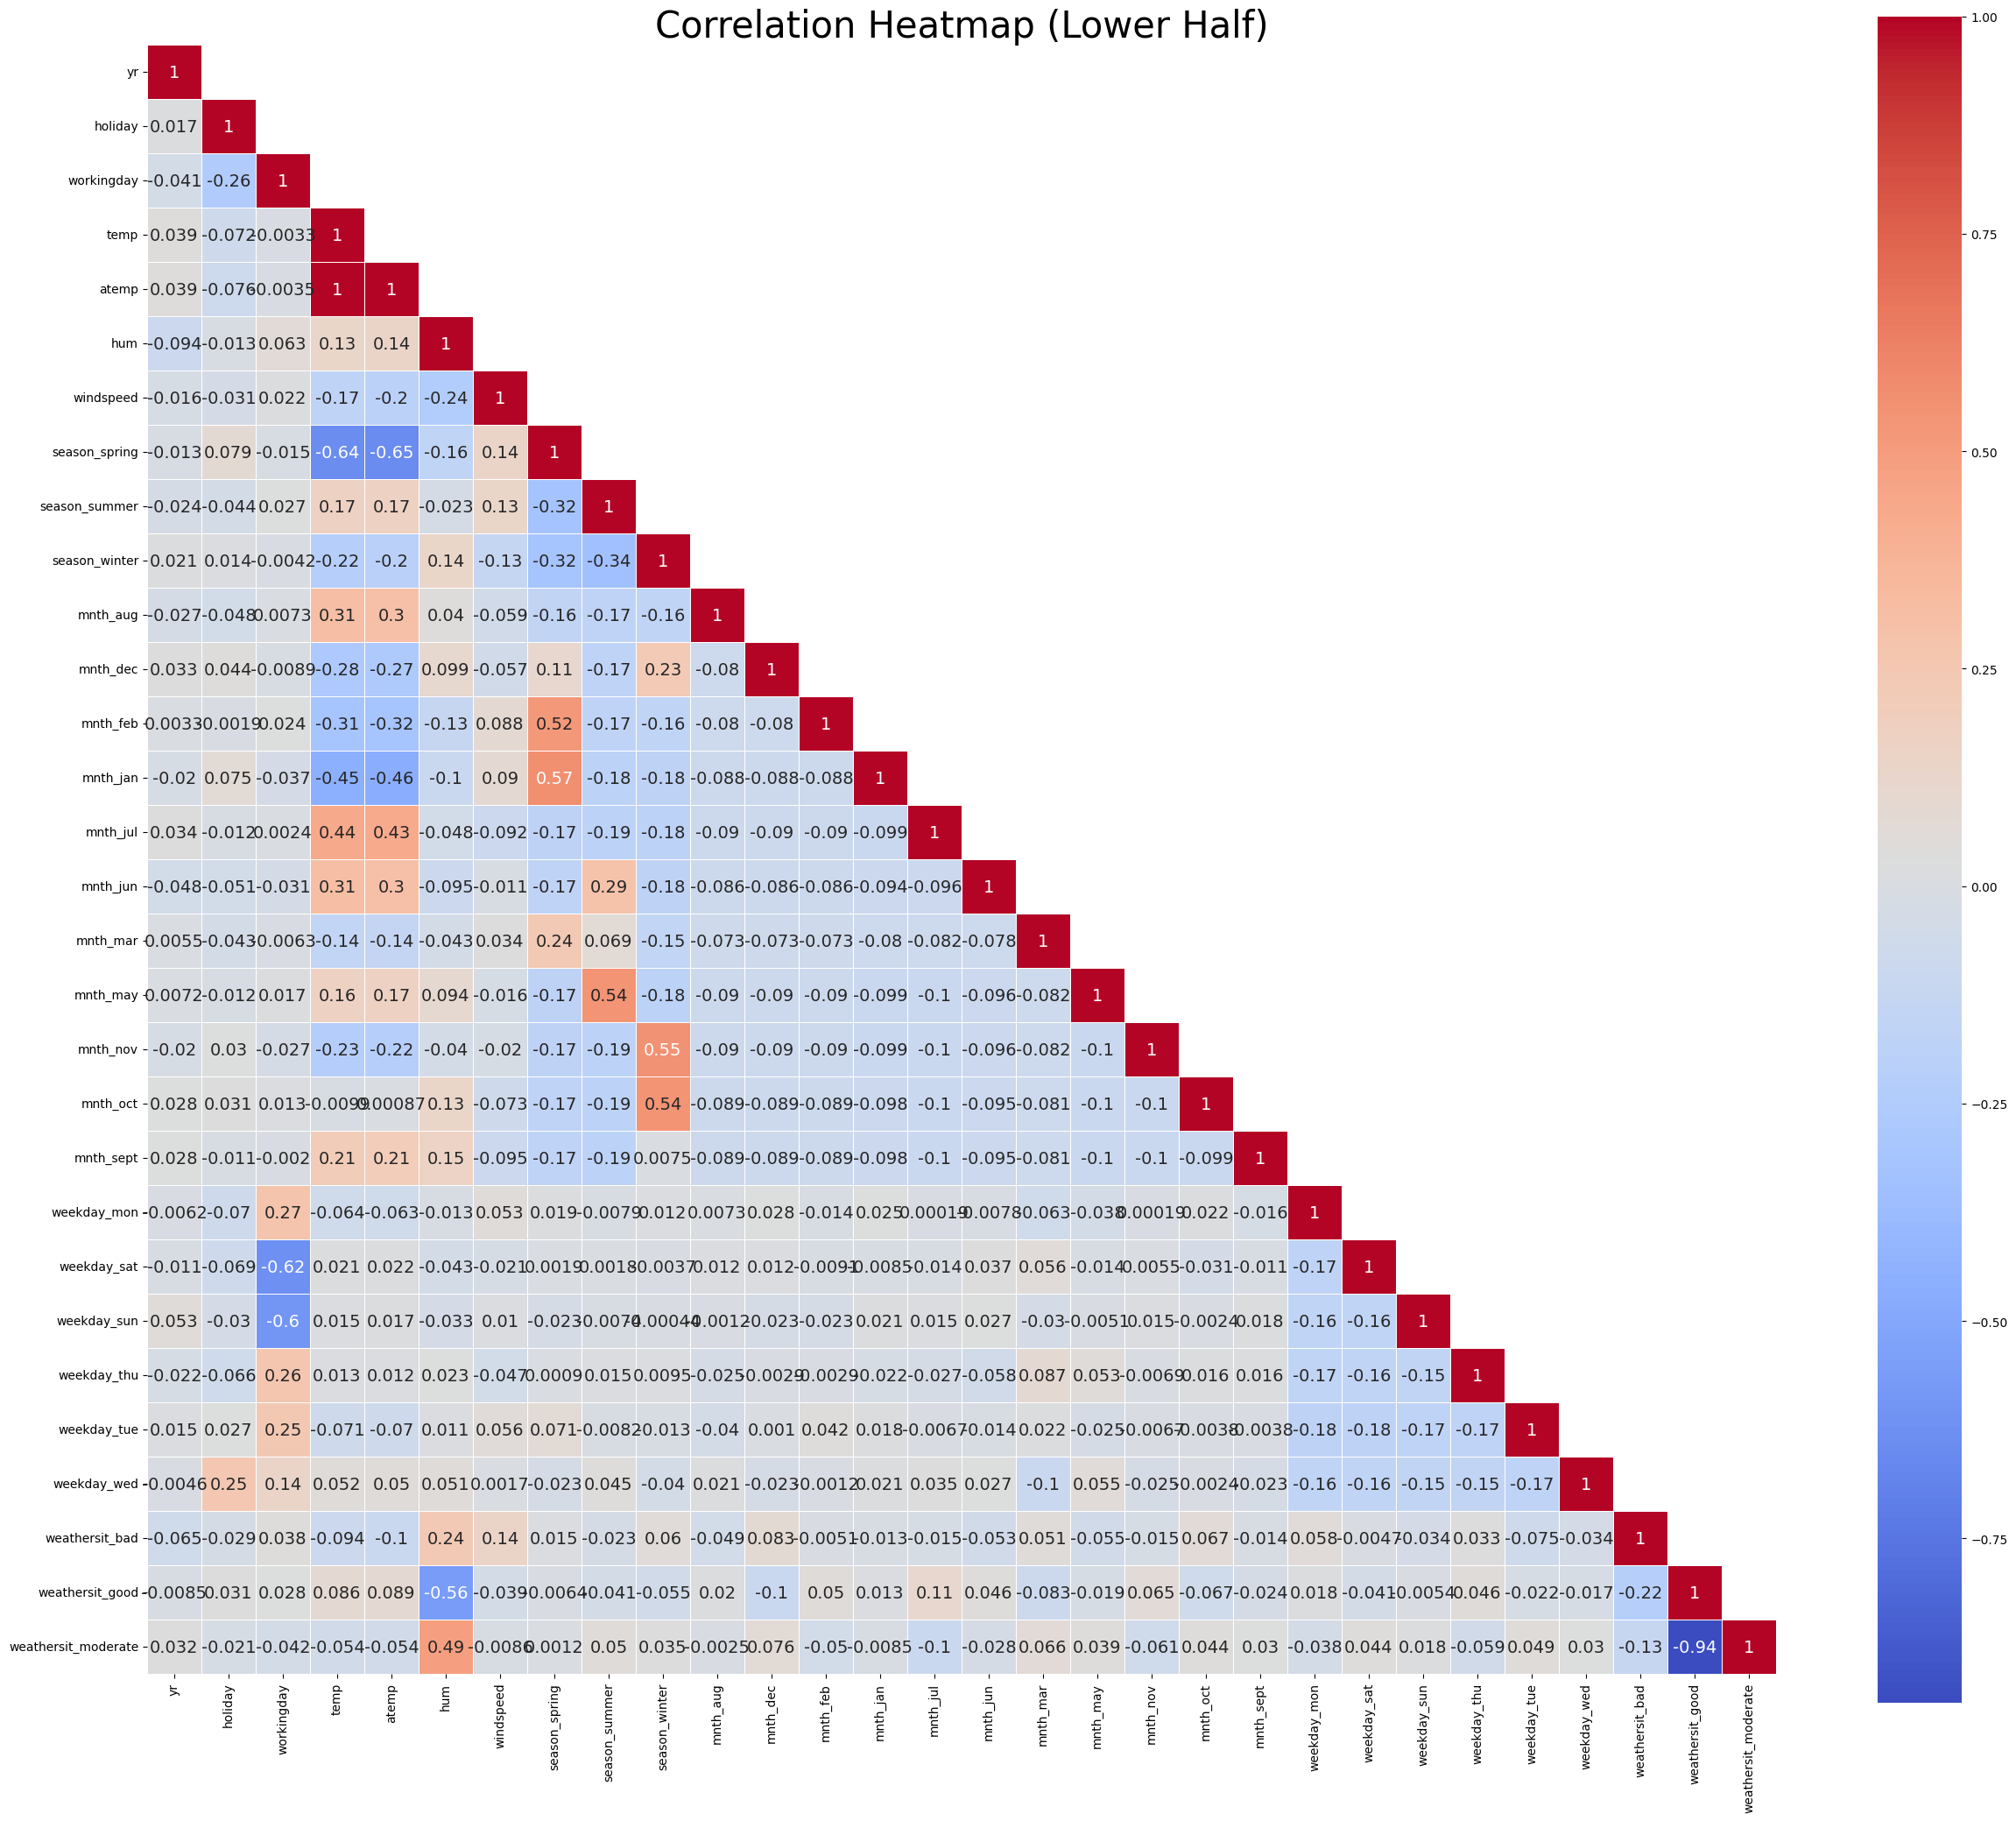

In [ ]:
plt.figure(figsize=(30, 25))

corr = X_train.corr()

sns.heatmap(corr, mask=np.triu(corr, k=1), annot=True, annot_kws={"size": 14}, cmap='coolwarm', square=True, linewidths=0.5)

plt.title('Correlation Heatmap (Lower Half)', fontsize=30)
plt.show()

### Build model using RFE

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Cut down number of features to 15 using automated approach
rfe = RFE(estimator=lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [ ]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 15),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 12),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 9),
 ('mnth_jan', False, 14),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 13),
 ('mnth_mar', True, 1),
 ('mnth_may', False, 2),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 4),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 5),
 ('weekday_sat', False, 10),
 ('weekday_sun', False, 8),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 16),
 ('weekday_wed', False, 6),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 3)]

In [ ]:
#Function to build a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [ ]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [ ]:
#Print Columns selected by RFE. We will manually eliminate for these columns
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [ ]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_feb', 'mnth_jan',
       'mnth_jun', 'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed',
       'weathersit_moderate'],
      dtype='object')

In [ ]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

In [ ]:
X_train_rfe.shape


(511, 15)

## Model-1

In [ ]:
X_train.dtypes

yr                       int64
holiday                  int64
workingday               int64
temp                   float64
atemp                  float64
hum                    float64
windspeed              float64
season_spring             bool
season_summer             bool
season_winter             bool
mnth_aug                  bool
mnth_dec                  bool
mnth_feb                  bool
mnth_jan                  bool
mnth_jul                  bool
mnth_jun                  bool
mnth_mar                  bool
mnth_may                  bool
mnth_nov                  bool
mnth_oct                  bool
mnth_sept                 bool
weekday_mon               bool
weekday_sat               bool
weekday_sun               bool
weekday_thu               bool
weekday_tue               bool
weekday_wed               bool
weathersit_bad            bool
weathersit_good           bool
weathersit_moderate       bool
dtype: object

In [ ]:
bool_columns = X_train.select_dtypes(include='bool').columns

In [ ]:
X_train[bool_columns] = X_train[bool_columns].astype(int)

In [ ]:
X_train.dtypes

yr                       int64
holiday                  int64
workingday               int64
temp                   float64
atemp                  float64
hum                    float64
windspeed              float64
season_spring            int32
season_summer            int32
season_winter            int32
mnth_aug                 int32
mnth_dec                 int32
mnth_feb                 int32
mnth_jan                 int32
mnth_jul                 int32
mnth_jun                 int32
mnth_mar                 int32
mnth_may                 int32
mnth_nov                 int32
mnth_oct                 int32
mnth_sept                int32
weekday_mon              int32
weekday_sat              int32
weekday_sun              int32
weekday_thu              int32
weekday_tue              int32
weekday_wed              int32
weathersit_bad           int32
weathersit_good          int32
weathersit_moderate      int32
dtype: object

In [ ]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     165.0
Date:                Tue, 08 Oct 2024   Prob (F-statistic):          1.70e-181
Time:                        18:05:02   Log-Likelihood:                -4134.9
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     495   BIC:                             8370.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2809.2461    

### Model-2

In [ ]:
# Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.1
Date:                Tue, 08 Oct 2024   Prob (F-statistic):          1.35e-182
Time:                        18:05:02   Log-Likelihood:                -4135.0
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     496   BIC:                             8363.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2792.2799    

### Model-3

In [ ]:
# Dropping the variable hum as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     183.6
Date:                Tue, 08 Oct 2024   Prob (F-statistic):          3.37e-180
Time:                        18:05:02   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8315.
Df Residuals:                     497   BIC:                             8374.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2004.0762    

### Model-4

In [ ]:
# Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.1
Date:                Tue, 08 Oct 2024   Prob (F-statistic):          1.51e-178
Time:                        18:05:02   Log-Likelihood:                -4150.1
No. Observations:                 511   AIC:                             8326.
Df Residuals:                     498   BIC:                             8381.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1845.8415    

### Model-5

In [ ]:
# Dropping the variable mnth_jul,temp as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.0
Date:                Tue, 08 Oct 2024   Prob (F-statistic):          8.20e-179
Time:                        18:05:02   Log-Likelihood:                -4152.2
No. Observations:                 511   AIC:                             8328.
Df Residuals:                     499   BIC:                             8379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1779.2943    

### Model-6

In [ ]:
## Trying to replace July with spring as both were highly correlated
#removing of working_day,Summer and adding temp

cols6 = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate','temp']
build_model(cols6)
get_vif(cols6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Tue, 08 Oct 2024   Prob (F-statistic):          9.73e-178
Time:                        18:05:02   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1740.7372    

Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R Squared is 0.81
Hence we finalize this model to use further

In [ ]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [ ]:
#Let us build the finalmodel using sklearn
#Build a model with above columns
lr = build_model_sk(X_train[cols6],y_train)
print(lr.intercept_,lr.coef_)

1740.737244016429 [ 1994.67955569 -1167.70089558  -514.63181313   496.75430396
   465.92729708   190.37518346 -2256.10482681  -662.38986442
  3984.25555511]


### Residual Analysis

In [ ]:
y_train_pred = lr.predict(X_train[cols6])

In [ ]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

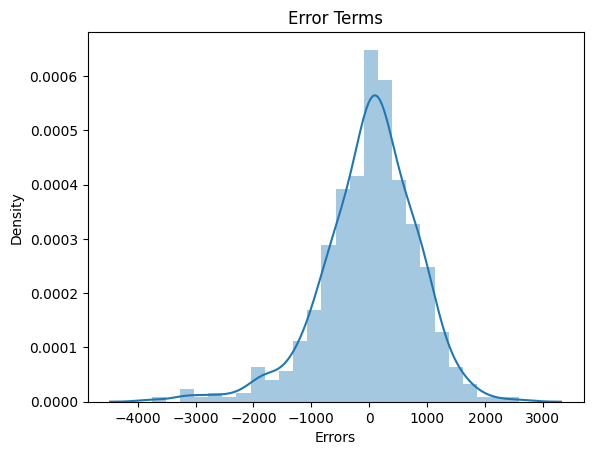

In [ ]:
plot_res_dist(y_train, y_train_pred)

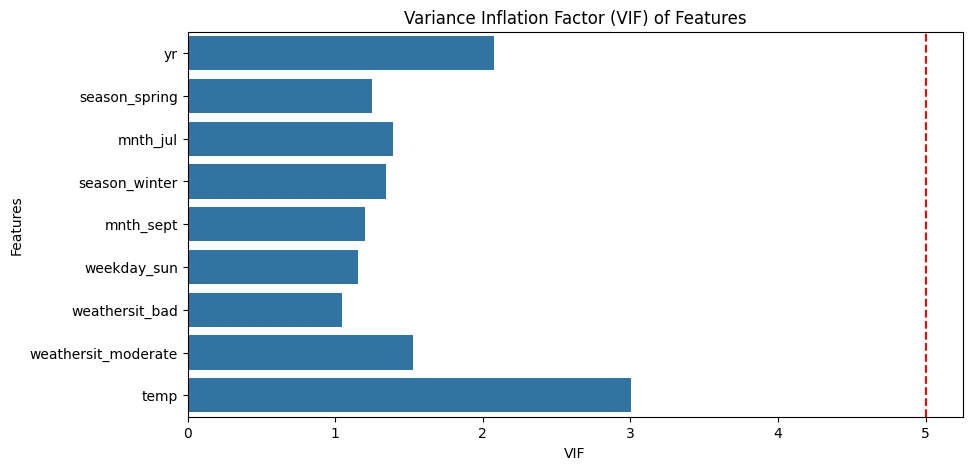

In [ ]:
vif_data = pd.DataFrame()
vif_data['Features'] = cols6
vif_data['VIF'] = [variance_inflation_factor(X_train[cols6].values, i) for i in range(len(cols6))]

plt.figure(figsize=(10, 5))
sns.barplot(x='VIF', y='Features', data=vif_data)
plt.title('Variance Inflation Factor (VIF) of Features')
plt.axvline(5, color='red', linestyle='--')
plt.xlabel('VIF')
plt.show()

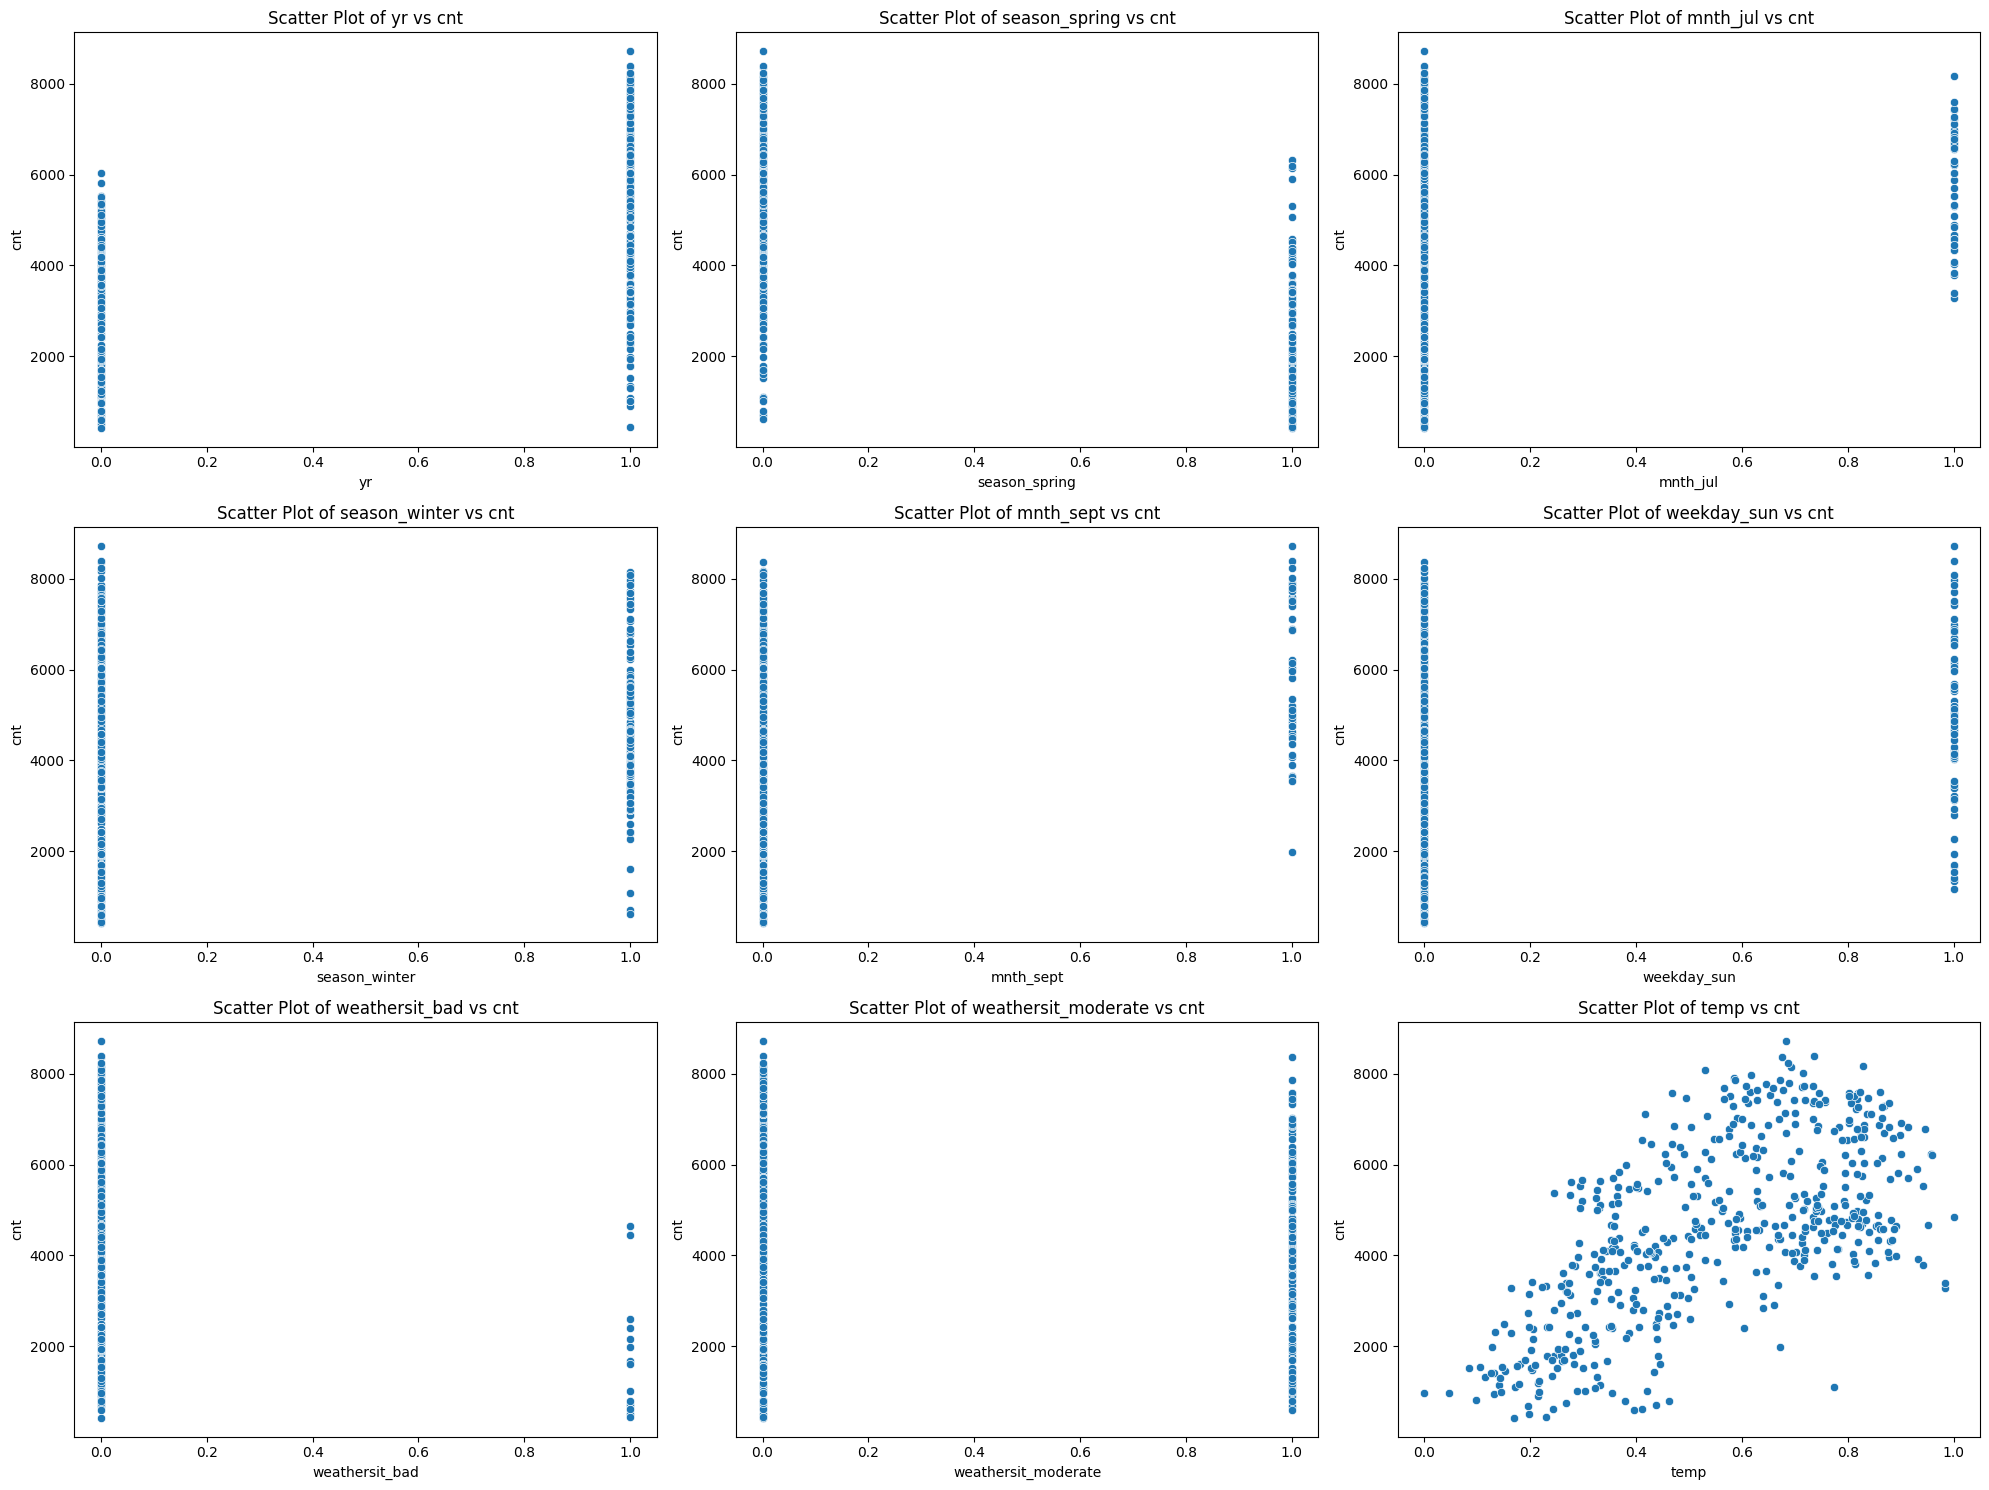

In [ ]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(cols6, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=X_train[col], y=y_train)
    plt.title(f'Scatter Plot of {col} vs cnt')
    plt.xlabel(col)
    plt.ylabel('cnt')
plt.tight_layout()
plt.show()

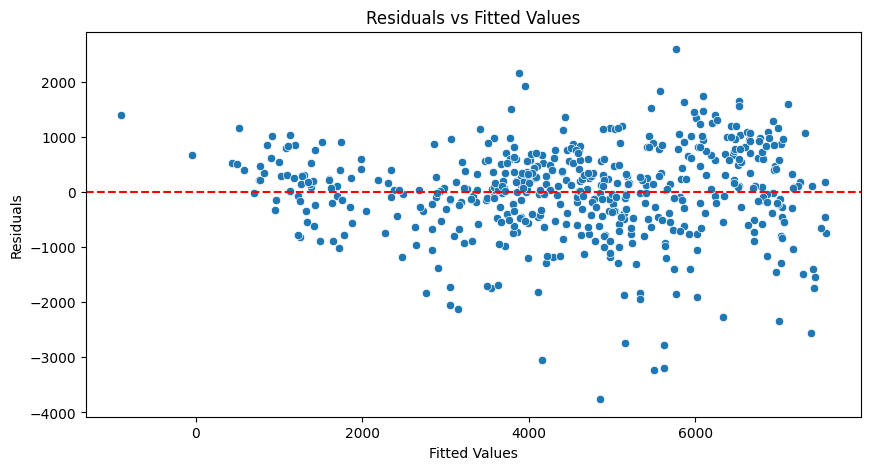

In [ ]:
residuals = y_train - y_train_pred

plt.figure(figsize=(10, 5))
sns.scatterplot(x=lr.predict(X_train[cols6]), y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


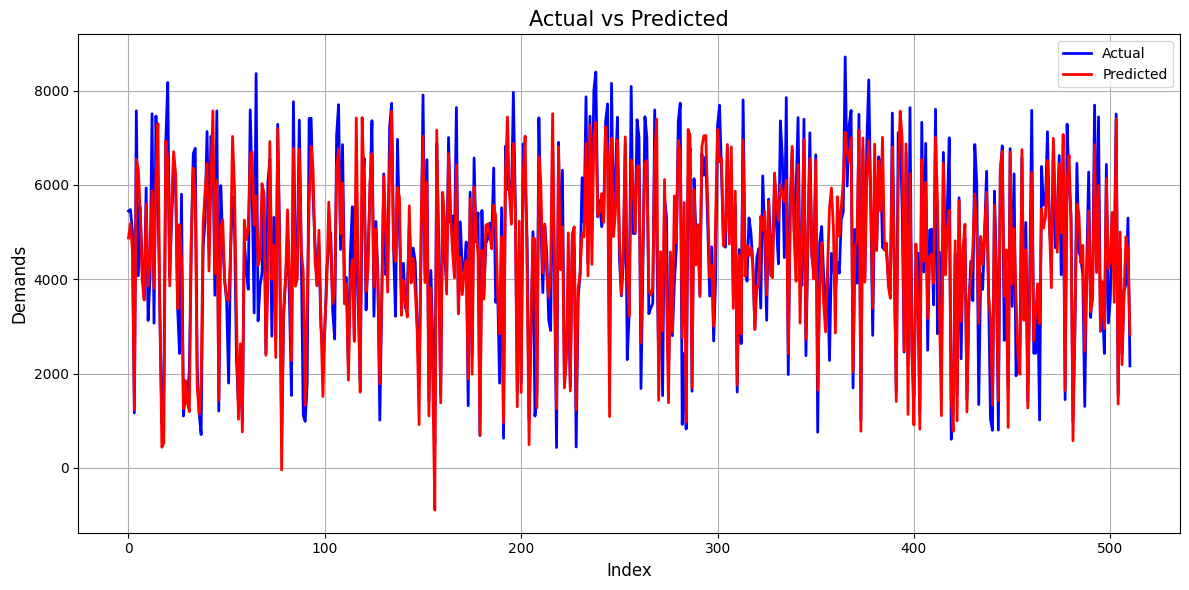

In [ ]:

# Actual vs Predicted
c = [i for i in range(len(X_train))]
plt.figure(figsize=(12, 6))

plt.plot(c, y_train, color="blue", label="Actual", linewidth=2)
plt.plot(c, y_train_pred, color="red", label="Predicted", linewidth=2)

plt.title('Actual vs Predicted', fontsize=15)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Demands', fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## Model Predictions

## R-Squared value for train predictions

In [ ]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8158045196281631

### Prediction of values on test dataset

In [ ]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [ ]:
cols6 = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate','temp']

#Predicting test data values
y_test_pred = lr.predict(X_test[cols6])

## R-Squared value for test predictions

In [ ]:
# Find out the R squared value between test and predicted test data sets.
r2_score(y_test,y_test_pred)

0.812722870299522

## Evaluating the model

In [ ]:
#evaluating the model based on r2_score(as mentioned in the problem statement as well)
y_pred=y_test_pred
r2_score(y_test, y_pred)

0.812722870299522

Text(0, 0.5, 'y_pred')

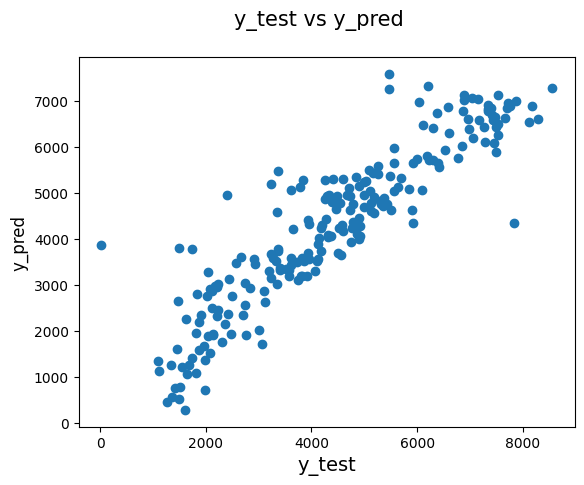

In [ ]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)
plt.xlabel('y_test', fontsize = 14)
plt.ylabel('y_pred', fontsize = 12)

In [ ]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols6 = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate','temp']

lm = build_model(cols6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Tue, 08 Oct 2024   Prob (F-statistic):          9.73e-178
Time:                        18:05:04   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1740.7372    

### Conclusion
Significant variables to predict the demand for shared bikes

- holiday
- temp
- hum
- windspeed
- Season
- months(January, July, September, November, December)
- Year
- Sunday
- weathersit(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds )
